# Plotting Baseline Results for High Niche Rate Group (`pop_four` - 'high')

**Objective:** Generate point-line graphs comparing evaluation strategies (`eva_two` vs. `eva_three`) for %ΔGAP and NDCG@10 metrics, specifically focusing on the **'high' user group** under the `pop_four` (NicheConsumptionRate) popularity notion. Each plot displays all specified algorithms simultaneously.

**Data Source:** `consolidated_results.csv` (Baseline data before mitigation).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting style
sns.set_theme(style="whitegrid")

In [2]:
# Load the baseline results data
try:
    df = pd.read_csv('consolidated_results.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: consolidated_results.csv not found. Please ensure the file is in the correct directory.")
    # You might want to stop execution here if the file is critical
    # exit()
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")
    # exit()

# --- Initial Filtering --- 
# 1. Filter for the specific popularity notion
df_pop4 = df[df['popularity_notion'] == 'pop_four'].copy()

# 2. Filter out T-test rows
df_pop4_metrics = df_pop4[~df_pop4['metric_type'].str.contains('_TTEST', na=False)].copy()

# 3. Filter for the 'high' user group only
# Note: For pop_four, 'high' means high niche consumption rate (Niche-focused users)
df_high_niche = df_pop4_metrics[df_pop4_metrics['user_group'] == 'high'].copy()

print(f"Filtered down to {len(df_high_niche)} rows for 'pop_four' high group metrics.")
df_high_niche.head()

Data loaded successfully.
Filtered down to 48 rows for 'pop_four' high group metrics.


,domain,evaluation_strategy,popularity_notion,algorithm,metric_type,user_group,comparison_group,value,p_value
156,music,eva_two,pop_four,MostPop,NDCG,high,NaN,0.641268,NaN
157,music,eva_two,pop_four,UserKNN,NDCG,high,NaN,0.644706,NaN
158,music,eva_two,pop_four,ItemKNN,NDCG,high,NaN,0.635378,NaN
159,music,eva_two,pop_four,PMF,NDCG,high,NaN,0.641912,NaN
160,music,eva_two,pop_four,NMF,NDCG,high,NaN,0.638195,NaN



Generating plot for: Domain='music', Metric='GAP'...


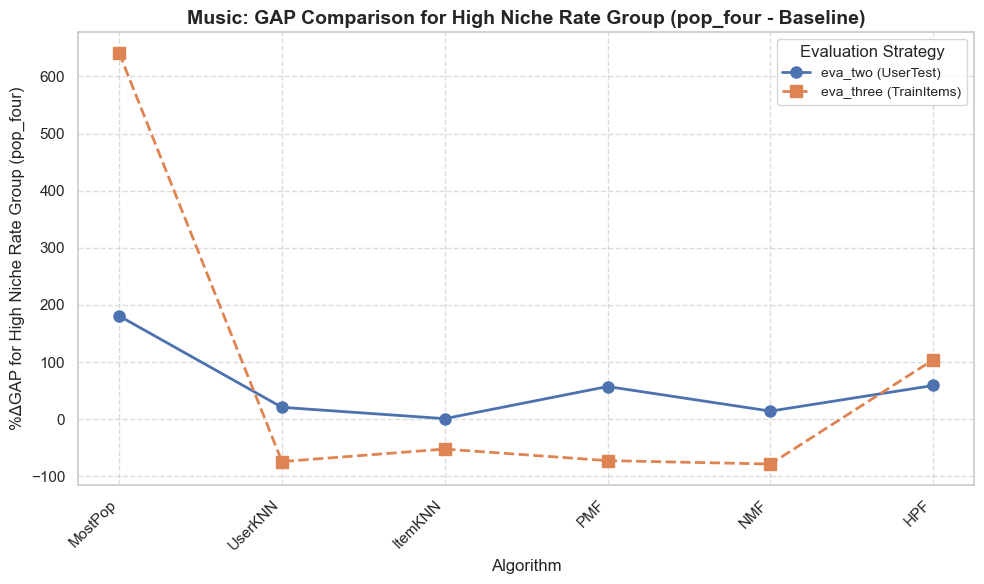


Generating plot for: Domain='music', Metric='NDCG'...


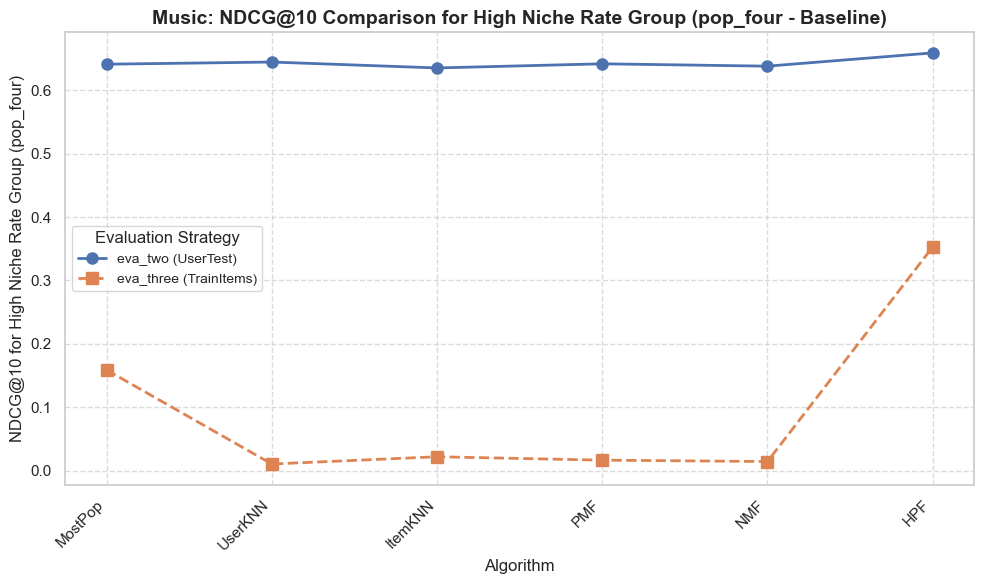


Generating plot for: Domain='movies', Metric='GAP'...


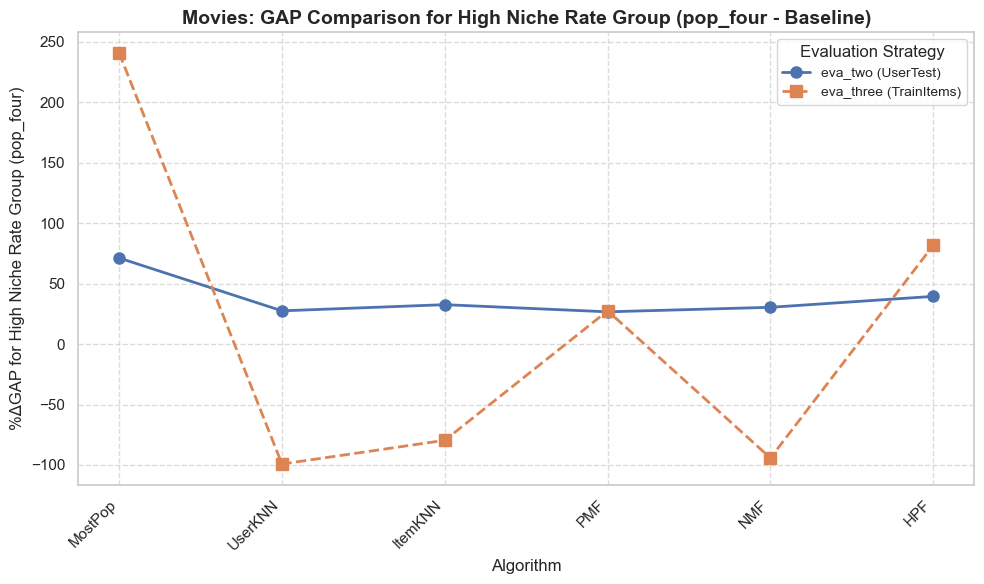


Generating plot for: Domain='movies', Metric='NDCG'...


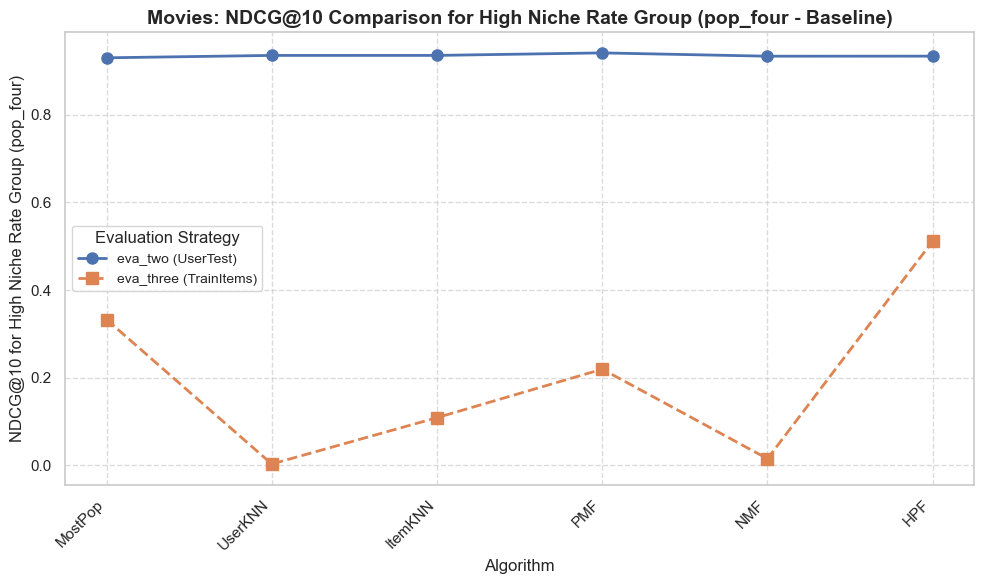

In [3]:
# Define the specific order for algorithms on the x-axis
algo_order = ["MostPop", "UserKNN", "ItemKNN", "PMF", "NMF", "HPF"]

# Define metrics and domains to iterate over
metrics_to_plot = ['GAP', 'NDCG']
domains_to_plot = ['music', 'movies']

for domain in domains_to_plot:
    for metric in metrics_to_plot:
        print(f"\nGenerating plot for: Domain='{domain}', Metric='{metric}'...")
        
        # Filter data for the current domain and metric
        df_plot = df_high_niche[(df_high_niche['domain'] == domain) & 
                                (df_high_niche['metric_type'] == metric)].copy()
        
        if df_plot.empty:
            print(f"  No data found for Domain='{domain}', Metric='{metric}'. Skipping plot.")
            continue
            
        # Pivot the table to get evaluation strategies as columns
        try:
            df_pivot = df_plot.pivot_table(index='algorithm', 
                                           columns='evaluation_strategy', 
                                           values='value')
        except Exception as e:
            print(f"  Error pivoting data for Domain='{domain}', Metric='{metric}': {e}. Skipping plot.")
            print("  Data causing error:")
            print(df_plot)
            continue
            
        # Reindex to ensure consistent algorithm order and handle missing algorithms
        df_pivot = df_pivot.reindex(algo_order)
        
        # Prepare data for plotting (handle potential NaNs from pivot/reindex)
        algorithms = df_pivot.index
        eva_two_values = df_pivot['eva_two'].values if 'eva_two' in df_pivot.columns else np.full(len(algorithms), np.nan)
        eva_three_values = df_pivot['eva_three'].values if 'eva_three' in df_pivot.columns else np.full(len(algorithms), np.nan)

        # --- Create Plot --- 
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot eva_two
        ax.plot(algorithms, eva_two_values, marker='o', linestyle='-', label='eva_two (UserTest)', markersize=8, linewidth=2)
        
        # Plot eva_three
        ax.plot(algorithms, eva_three_values, marker='s', linestyle='--', label='eva_three (TrainItems)', markersize=8, linewidth=2)

        # --- Labels and Title --- 
        ax.set_xlabel("Algorithm", fontsize=12)
        
        y_axis_label = f"{metric}{'@10' if metric == 'NDCG' else ''} for High Niche Rate Group (pop_four)"
        if metric == 'GAP':
            y_axis_label = f"%ΔGAP for High Niche Rate Group (pop_four)"
        ax.set_ylabel(y_axis_label, fontsize=12)
        
        plot_title = f"{domain.capitalize()}: {metric}{'@10' if metric == 'NDCG' else ''} Comparison for High Niche Rate Group (pop_four - Baseline)"
        ax.set_title(plot_title, fontsize=14, fontweight='bold')

        # --- Legend and Grid --- 
        ax.legend(title="Evaluation Strategy", fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45, ha='right') # Rotate x-labels for better readability
        plt.tight_layout()
        plt.show()

**Interpretation Note:**
Remember that for `pop_four`, the 'high' group consists of users who consume a high *percentage* of niche items (bottom 30% popularity). Therefore, these plots show the %ΔGAP and NDCG results specifically for these **Niche-focused users**.